# Un cadavre exquis pour découvrir le travail collaboratif `Git`

Lino Galiana  
2025-03-19

# 1. Un cadavre exquis pour découvrir le travail collaboratif

Jusqu’à présent, nous avons découvert les vertus de `Git` dans un projet
individuel. Nous allons maintenant aller plus loin dans un projet
collectif. Pour rappel, dans le chapitre précédent nous avons évoqué les concepts natifs de `Git` que sont dépôts local et distant (`remote`), l’opération de `clone`, *staging area*, `commit`, `push`, `pull`, les branches. Nous avons aussi évoqué certains concepts liés à la forge `Github` que sont l’authentification et les *issues*.

Maintenant, nous allons évoquer les enjeux liés au travail collaboratif, ce qui nous amènera, notamment, à évoquer les enjeux de la gestion de conflits.

# 2. Le *workflow* adopté

Nous allons adopter le mode de travail le plus simple, le *Github flow*. Nous l’avons déjà adopté lors du dernier exercice du chapitre précédent, consacré à l’utilisation des branches.

Le *Github flow* correspond à cette forme caractéristique d’arbre:

1.  La branche `main` constitue le tronc
2.  Les branches partent de `main` et divergent
3.  Lorsque les modifications aboutissent, elles sont intégrées à `main` ;
    la branche en question disparaît :

![](https://inseefrlab.github.io/formation-bonnes-pratiques-git-R/slides/img/ghflow.png)

Des *workflows* plus complexes existent pour les projets de grande envergure.

Il existe des *workflows* plus complexes, notamment le `Git Flow` que j’utilise
pour développer ce cours. [Ce tutoriel](https://www.atlassian.com/fr/git/tutorials/comparing-workflows/gitflow-workflow), très bien fait,
illustre avec un graphique la complexité accrue de ce flow :

![](https://wac-cdn.atlassian.com/dam/jcr:8f00f1a4-ef2d-498a-a2c6-8020bb97902f/03%20Release%20branches.svg?cdnVersion=55)

Cette fois, une branche intermédiaire, par exemple une branche `development`,
intègre des modifications à tester avant de les intégrer dans la version
officielle (`main`).

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-lightbulb"></i> Tip</h3>

Vous pourrez trouvez des dizaines d’articles et d’ouvrages sur ce sujet dont chacun prétend avoir trouvé la meilleure organisation du travail (*Git flow*, *GitHub flow*, *GitLab flow*…). Ne lisez pas trop ces livres et articles sinon vous serez perdus (un peu comme avec les magazines destinés aux jeunes parents…).

La méthode de travail la plus simple est le *Github flow* qu’on vous a proposé d’adopter. L’arborescence est reconnaissable : des branches divergent et reviennent systématiquement vers `main`.

Pour des projets plus complexes dans des équipes développant des applications, on pourra utiliser d’autres méthodes de travail, notamment le `Git flow`. Il n’existe pas de règles universelles pour déterminer la méthode de travail ; l’important c’est, avant tout, de se mettre d’accord sur des règles communes de travail avec votre équipe.

</div>

## 2.1 Les conflits

Au cours du dernier exercice du chapitre précédent, nous avons, sans vraiment l’expliquer, découvert le principe du *merge* (ou fusion, en Français). Les fusions de versions consistent à réconcilier deux versions d’un code. Cela peut se faire en privilégiant l’une sur l’autre ou bien en choisissant, dans les passages qui divergent, parfois l’une et parfois l’autre. On parle de conflits pour désigner une situation où un même fichier présente deux versions différentes qui doivent être réconciliées.

`Git` simplifie énormément la gestion de conflits, c’est l’une des raisons de son succès. Si vous avez déjà partagé du code par mail en équipe, vous devez savoir que réconcilier des versions est extrêmement fastidieux : il faut, plus ou moins ligne à ligne, vérifier que la version que vous avez reçu par mail ne diffère pas de la vôtre, que vous avez fait évoluer en parallèle. Grâce au suivi fin de l’évolution d’un fichier que permet `Git`, cette gestion de conflits sera facilitée. Il faudra tout de même privilégier une version sur l’autre mais cela sera plus rapide et plus fiable.

Si `Git` offre des fonctionnalités intéressantes, pour la gestion des conflits, ce n’est néanmoins pas une excuse pour être désorganisé. Comme nous allons le voir dans les prochains exercices, on a certes des chapitres

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-lightbulb"></i> Méthode pour les merges</h3>

Lors du chapitre précédent, nous avons fait un *merge* de notre branche `issue-1` vers `main`, notre branche principale. Nous sommes passés par l’interface de `Github` pour faire cela. Il s’agit de la méthode recommandée pour les *merges* vers `main`. Cela permet de garder une trace explicite de ceux-ci (par exemple [ici](https://github.com/linogaliana/python-datascientist/pulls?q=is%3Apr+is%3Aclosed)), sans avoir à chercher dans l’arborescence, parfois complexe, d’un projet.

La bonne pratique veut qu’on fasse un `squash commit` pour éviter une inflation du nombre de commits dans `main`: les branches ont vocation à proposer une multitude de petits commits, les modifications dans `main` doivent être simples à tracer d’où le fait de modifier des petits bouts de code.

Comme on l’a fait dans un exercice précédent, il est très pratique d’ajouter dans le corps du message `close #xx` où `xx` est le numéro d’une *issue* associée à la `pull request`. Lorsque la `pull request` sera fusionnée, l’*issue* sera automatiquement fermée et un lien sera créé entre l’`issue` et la `pull request`. Cela vous permettra de comprendre, plusieurs mois ou années plus tard comment et pourquoi telle ou telle fonctionnalité a été implémentée.

En revanche, l’intégration des dernières modifications de `main` vers une branche se fait en local. Si votre branche est en conflit, **le conflit doit être résolu dans la branche et pas dans main**.
`main` doit toujours rester propre.

</div>

## 2.2 Divergence d’historique: les différentes situations

### 2.2.1 Cas simple

Imaginons deux personnes qui collaborent sur un projet, Alice et Bob. Bob a mis de côté le projet quelques jours. Il veut récupérer les avancées faites par Alice pendant cette période. Celle-ci a fait évoluer le projet, supposons avec un seul *commit* puisque cela ne change rien.

<figure id="fig-history-simple">
<img src="https://inseefrlab.github.io/formation-bonnes-pratiques-git-R/slides/img/ff.png" />
<figcaption>Figure 2.1: Historique de Bob en retard (cas simple)</figcaption>
</figure>

L’historique de Bob est cohérent avec celui sur `Github`, il lui manque juste le dernier *commit* en bleu (<a href="#fig-history-simple" class="quarto-xref">Figure 2.1</a>). Il suffit donc à Bob de récupérer ce *commit* en local avant de commencer à éditer ses fichiers.

Ce type de fusion est un *fast-forward merge*. Le commit distant est rajouté à l’historique local, sans difficulté. Le dépôt local est à nouveau à jour avec le dépôt distant.

Il s’agit du *merge* idéal car celui-ci peut être automatisé, il n’y a aucun risque d’écraser des modifications faites par Bob par celles d’Alice. Une organisation d’équipe adéquate permettra de s’assurer que la plupart des *merges* seront de ce type.

### 2.2.2 Cas plus compliqué

Maintenant, imaginons le cas plus compliqué où Bob avait fait évoluer son code en parallèle, sans récupérer les modifications d’Alice avant de revenir sur le projet.

Son historique local diverge donc de l’historique distant:

<figure id="fig-history-complicated">
<img src="https://inseefrlab.github.io/formation-bonnes-pratiques-git-R/slides/img/divergence.png" />
<figcaption>Figure 2.2: Historique de Bob en retard (cas plus compliqué)</figcaption>
</figure>

Les derniers commits ne sont pas les mêmes. `Git` ne peut pas résoudre de lui-même la divergence. C’est à Bob de trancher sur la version qu’il préfère. Deux stratégies pour réconcilier les historiques sont accessibles:

-   Le *merge* ;
-   Le *rebase*.

La première méthode, la plus simple, est le *merge*.

<figure id="fig-history-merge">
<img src="https://inseefrlab.github.io/formation-bonnes-pratiques-git-R/slides/img/merge.png" />
<figcaption>Figure 2.3: Historique de Bob en retard: résolution par <em>merge</em></figcaption>
</figure>

Le rapatriement des modifications d’Alice dans l’historique de Bob crée un premier commit de *merge*. Les fichiers en question présenteront alors des balises permettant d’identifier la divergence de version et la source de celle-ci. Dans le fichier brut, cela donnera

``` python
import pandas as pd

<<<<<<< main
toto = pd.read_csv("source.csv")
=======
toto = pd.read_csv("source.csv", sep = ";")
>>>>>>> zyx911fhjehzafoldfkjknvjnvjnj;

toto.head(2)
```

`VSCode`, grâce à l’extension `Git`, propose une visualisation native de ce bout de code et propose, en clique-bouton, différentes manières de réconcilier les versions. Il est bien sûr toujours possible d’éditer ces fichiers : il suffit de supprimer les balises et modifier les lignes en question.

<figure id="fig-conflict">
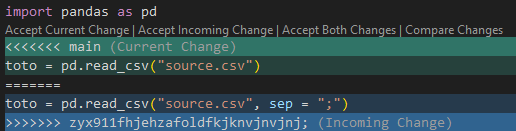
<figcaption>Figure 2.4: Les conflits dans VSCode</figcaption>
</figure>

Une fois les versions réconciliées, il ne reste plus qu’à faire un nouveau *commit*. Cette histoire réconcilie les versions d’Alice et Bob. L’inconvénient est qu’elle rend l’historique non linéaire (voir la [documentation d’Atlassian](https://www.atlassian.com/fr/git/tutorials/using-branches/git-merge) pour plus de détails) mais c’est `Git` qui a géré automatiquement ce sujet en créant une branche temporaire. Jusqu’à récemment, ceci était le comportement par défaut de `Git`.

Une autre approche est accessible, le *rebase*. *In fine* ceci va correspondre à cet historique, propre.

<figure id="fig-history-rebase1">
<img src="https://inseefrlab.github.io/formation-bonnes-pratiques-git-R/slides/img/rebase1.png" />
<figcaption>Figure 2.5</figcaption>
</figure>

Néanmoins ceci implique des étapes intermédiaires qui consistent à réécrire l’historique, ce qui est déjà une opération avancée. En fait, `Git` effectue trois étapes:

1.  Supprime temporairement le *commit* local
2.  Réalise un *fast forward merge* maintenant que le *commit* local n’est plus là
3.  Rajoute le commit local au bout de l’historique

<figure id="fig-history-rebase2">
<img src="https://inseefrlab.github.io/formation-bonnes-pratiques-git-R/slides/img/rebase2.png" />
<figcaption>Figure 2.6</figcaption>
</figure>

Le *commit* local a changé d’identité, ce qui explique son nouveau SHA. Cette approche présente l’avantage de garder un historique linéaire. Néanmoins, elle peut avoir des effects de bord et est donc à utiliser avec précaution (plus d’explications dans [la documentation de `Git`](https://git-scm.com/book/fr/v2/Les-branches-avec-Git-Rebaser-Rebasing#s_rebase_peril)). Quand on débute, et même après, il est recommandé de privilégier la méthode *merge*. Pour cela, en ligne de commande, il faut taper la commande

``` shell
git config pull.rebase false
```

# 3. Mise en pratique

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 1 : Interactions avec le dépôt distant</h3>

Cet exercice se fait par groupe de trois ou quatre. Il y aura deux rôles dans ce scénario :

-   Une personne aura la responsabilité d’être **mainteneur**
-   Deux à trois personnes seront **développeurs**.

1️⃣ Le.la mainteneur.e crée un dépôt sur `Github` **sans cliquer sur l’option `Add a README`**. Créer un `.gitignore` selon le modèle `Python`. Il/Elle donne des droits au(x) développeur.euse(s) du projet (`Settings > Manage Access > Invite a collaborator`).

2️⃣ Chaque membre du projet, crée une copie locale du projet (un *clone*). Si vous avez un trou de mémoire, vous pouvez retourner au chapitre précédent pour vérifier la démarche.

3️⃣ Chaque membre du projet crée un fichier avec son nom et son prénom, selon cette structure `nom-prenom.md` en évitant les caractères spéciaux. Il écrit dedans trois phrases de son choix **sans ponctuation ni majuscules** (pour pouvoir effectuer une correction ultérieurement). Enfin, il *commit* sur le projet **par le biais de l’extension visuelle**.

<details>

<summary>

En ligne de commande cela donnerait les commandes équivalentes

</summary>

``` shell
git add nom-prenom.md
git commit -m "C'est l'histoire de XXXXX"
```

</details>

4️⃣ Chacun essaie d’envoyer (*push*) ses modifications locales sur le dépôt en passant par les boutons adéquats de l’extension visuelle.

<details>

<summary>

En ligne de commande cela donnerait la commande équivalente

</summary>

``` shell
git push origin main
```

</details>

5️⃣ A ce stade, une seule personne (la plus rapide) devrait ne pas avoir rencontré de rejet du `push`. C’est normal, avant d’accepter une modification `Git` vérifie en premier lieu la cohérence de la branche avec le dépôt distant. Le premier ayant fait un `push` a modifié le dépôt commun ; les autres doivent intégrer ces modifications dans leur version locale (*pull*) avant d’avoir le droit de proposer un changement.

Pour celui/celle/ceux dont le `push` a été refusé, il faudra faire un *pull*. Faire celui-ci en utilisant l’extension graphique de `VSCode`.

<details>

<summary>

En ligne de commande cela donnerait la commande équivalente

</summary>

``` shell
git pull origin main
```

</details>

pour essayer de ramener les modifications distantes en local. Celui-ci devrait échouer et les options affichées par VSCode ne devraient pas vous permettre de résoudre le problème, seulement de le comprendre. En cliquant sur `Show command output`, vous devriez voir s’afficher le message suivant:

``` python
hint: You have divergent branches and need to specify how to reconcile them.
hint: You can do so by running one of the following commands sometime before
hint: your next pull:
hint:
hint:   git config pull.rebase false  # merge
hint:   git config pull.rebase true   # rebase
hint:   git config pull.ff only       # fast-forward only
hint:
hint: You can replace "git config" with "git config --global" to set a default
hint: preference for all repositories. You can also pass --rebase, --no-rebase,
hint: or --ff-only on the command line to override the configured default per
hint: invocation.
fatal: Need to specify how to reconcile divergent branches.
```

Dans un terminal ((`☰ > Terminal > New Terminal`), copier la règle `git config pull.rebase false` qui est recommandée lorsqu’on débute dans `Git` (et même quand on est plus à l’aise).

6️⃣ Regarder l’arbre obtenu dans l’interface pour comprendre comment a été intégrée la modification de votre camarade ayant pu faire son `push` avant.

Vous remarquerez que les commits de vos camarades sont intégrés tels quels à
l’histoire du dépôt.

7️⃣ Faire à nouveau un *push*. C’est fini pour la 2e personne. La dernière personne doit refaire, à nouveau, les étapes 5 à 7 (dans une équipe de quatre
il faudra encore le refaire une fois).

</div>

**❓ Question : que se serait-il passé si les différents membres du groupe avaient effectué leurs modifications sur un seul et même fichier ?**

Le prochain exercice offre une réponse à cette question.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 2 : Gérer les conflits quand on travaille sur le même fichier</h3>

Dans la continuité de l’exercice précédent, chaque personne va travailler sur les fichiers des autres membres de l’équipe.

1️⃣ Les deux ou trois développeurs ajoutent la ponctuation et les majuscules du fichier du premier développeur.

2️⃣ Ils sautent une ligne et ajoutent une phrase (pas tous la même).

3️⃣ Valider les résultats avec un *commit* et faire un *push*.

4️⃣ La personne la plus rapide n’a, normalement, rencontré aucune difficulté (elle peut s’arrêter temporairement pour regarder ce qui va se passer chez les voisins). Les autres voient leur `push` refusé et doivent faire un `pull`.

💥 Il y a conflit, ce qui doit être signalé par un message du type :

``` python
Auto-merging XXXXXX
CONFLICT (content): Merge conflict in XXXXXX.md
Automatic merge failed; fix conflicts and then commit the result.
```

5️⃣ Etudier le résultat de `git status`

6️⃣ Si vous ouvrez les fichiers incriminés, vous devriez voir des balises du type

``` python
<<<<<<< HEAD
this is some content to mess with
content to append
=======
totally different content to merge later
>>>>>>> new_branch_to_merge_later
```

qui sont mises en forme par `VSCode` comme dans la <a href="#fig-conflict" class="quarto-xref">Figure 2.4</a>.

7️⃣ Corriger les fichiers en choisissant, pour chaque bloc, la version qui vous convient grâce aux actions permises par Git (`Accept Current Change`…)

Faire un *commit* avec le titre “Résolution du conflit par XXXX” où `XXXX` est votre nom.

8️⃣ Faire un push. Pour la dernière personne, refaire les opérations 4 à 8

</div>

`Git` permet donc de travailler, en même temps, sur le même fichier et de limiter le nombre de gestes manuels nécessaires pour faire la fusion. Lorsqu’on travaille sur des bouts différents du même fichier, on n’a même pas besoin de faire de modification manuelle, la fusion peut être automatique.

`Git` est un outil très puissant. Mais, il ne remplace pas une bonne organisation du travail. Vous l’avez vu, ce mode de travail uniquement sur `main` peut être pénible. Les branches prennent tout leur sens dans ce cas.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 3 : Gestion des branches</h3>

1️⃣ Le.la mainteneur.euse va contribuer directement dans `main` et ne crée pas de branche. Chaque développeur crée une branche, en local nommée `contrib-XXXXX` où `XXXXX` est le prénom. Pour cela, dans l’interface de `VSCode`, cliquer sur `... > Branch > Create branch` et mettre le nom de la branche dans le menu adéquat  

<details>

<summary>

En ligne de commande cela donnerait la commande équivalente

</summary>

``` shell
git checkout -b contrib-XXXXX
```

</details>

2️⃣ Chaque membre du groupe crée un fichier `README.md` où il écrit une phrase sujet-verbe-complément. Le mainteneur est le seul à ajouter un titre dans le `README` (qu’il *commit* dans `main`).

3️⃣ Chacun *push* le produit de son subconscient sur le dépôt.

4️⃣ Les développeurs.euses ouvrent, chacun, une *pull request* sur `Github`. Le sens à choisir est branche -\> `main`. Les développeurs.euses donnent un titre explicite à cette *pull request*.

Le/la mainteneur.euse choisit une des `pull request` et la valide avec l’option `squash commits`. Vérifier sur la page d’accueil le résultat.

5️⃣ Chaque développeur revient sur `main` en cliquant sur `... > Checkout to` et en choisissant `main`. Faire un *pull*.

6️⃣ Revenir sur votre branche et faire `... > Branch > Merge` et choisir `main`. Regarder l’arbre obtenu.

7️⃣ L’auteur (si 2 développeurs) ou les deux auteurs (si 3 développeurs) de la `pull request` non validée doivent à nouveau répéter les opérations 5 et 6.

8️⃣ Une fois le conflit de version réglé et poussé, le mainteneur valide la `pull request` selon la même procédure que précédemment.

9️⃣ Vérifier l’arborescence du dépôt dans `Insights > Network`. Votre arbre doit avoir une forme caractéristique de ce qu’on appelle le `Github flow`:

![](https://inseefrlab.github.io/formation-bonnes-pratiques-git-R/slides/img/ghflow.png)

</div>

Il n’est absolument pas obligatoire que chaque projet collaboratif choisisse ce mode de collaboration. Pour de nombreux projets, où on édite pas le même bout de fichier en même temps, passer directement par `main` est suffisant. Le mode ci-dessus est important pour des projets conséquents, où la branche `main` se doit d’être irréprochable parce que, par exemple, elle entraîne une série de tests automatisés et le déploiement automatisé d’un livrable. Mais pour des projets plus modestes, il n’est pas indispensable d’aller dans un formalisme extrême. Le bon usage de `Git` est un usage pragmatique où celui-ci est utilisé pour ses avantages et où l’organisation du travail s’adapte à ceux-ci.

# 4. Les enjeux spécifiques liés à l’interaction difficile entre `Git` et les *notebooks*

Le format *notebook* est très intéressant pour l’expérimentation et la diffusion finale de résultats. Néanmoins, la structure complexe d’un *notebook* rend compliquée le contrôle de version. En effet, l’ouverture dans un éditeur adapté (`Jupyter` ou `VSCode`) offre une mise en forme qui ne correspond pas à la structure brute du fichier, tel qu’il est stocké sur le disque. En arrière plan, les *notebooks* sont des JSON qui embarquent de nombreux éléments: code, résultats d’exécution, métadonnées annexes… Le suivi fin des modifications du fichier permis par `Git` est compliqué sur un fichier ayant une telle structure. L’objectif de cet exercice est d’illustrer ces enjeux et évoque quelques solutions possibles.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 4 : Contrôle de version et notebooks, un ménage difficile</h3>

Cet exercice se fait toujours en équipe. Lorsqu’il est demandé de faire un *commit*,
lui donner un nom signifiant pour s’y retrouver facilement quand il est demandé de regarder l’historique.
Ne pas faire de *push* ou *pull* avant d’en arriver
à la partie où cela est demandé.

1.  Tous les membres de l’équipe reviennent à leur branche `main` sur leur copie de travail

Chaque membre de l’équipe fait les questions suivantes.

1.  Mesurer le poids de l’ensemble de l’historique en ligne de commande avec la commande

``` bash
du -sh .git
```

1.  Télécharger le *notebook* servant à cet exercice avant la commande suivante, en ligne de commande:

``` bash
curl "https://minio.lab.sspcloud.fr/lgaliana/python-ENSAE/inputs/git/exemple.ipynb" -o "notebook.ipynb"
```

-   Ne pas ouvrir ce fichier (objet de la prochaine question).

-   Faire un *commit* de ce *notebook* puis refaire

``` bash
du -sh .git
```

-   Observez le premier changement de poids de notre historique

1.  Ouvrir le *notebook*, exécuter ses cellules en les réordonnant si nécessaire pour débugger
    le fichier.

-   Faire un *commit* de ce *notebook* quand il fonctionne puis refaire

``` bash
du -sh .git
```

1.  Maintenant, faire les modifications suivantes du fichier:
    -   Modifier la cellule `df.head(3)` en `df.head(20)`
    -   Créer une nouvelle cellule avec le code `df["TYPEQU"].value_counts().plot(kind = "bar")`
    -   Modifier la variable `zoom_start` dans la cellule produisant la carte interactive. Fixer sa valeur à 13 plutôt que 15.

-   Faire un *commit* de ce *notebook* quand il fonctionne puis refaire

``` bash
du -sh .git
```

1.  Changer la couleur du *barplot* avec l’argument `color`. Sauvegarder, committer puis refaire

``` bash
du -sh .git
```

1.  Regarder l’historique depuis l’extension `VSCode`. Observer la manière dont évolue votre fichier à chaque *commit*.

Maintenant, nous pouvons passer à l’étape collaborative.

1.  Chaque membre de l’équipe *push*:

-   Si le *push* fonctionne (personne la plus rapide), modifier à nouveau à nouveau la couleur du *barplot*. *Committer* mais ne pas *pusher* (attendre que les autres membres du groupe l’ait fait puis passer à la question 9)
-   Si le *push* ne fonctionne pas (personnes moins rapides), passer à la question 9.

1.  Dans l’extension `VSCode`, afficher l’arbre en cliquant sur le bouton `View Git Graph`.

-   En haut de celui-ci, cliquer sur `Uncommitted changes`. Cela affiche les modifications qui ne sont pas encore acceptées.
-   Cliquer sur `notebook.ipynb` pour voir le *diff* entre votre version et celle de votre camarade. Comprenez-vous le problème ?
-   Accepter à la main chaque différence serait trop coûteux. Accepter la version de votre camarade (*Accept incoming*). *Committer* et observer le *diff*. Pusher.

Pour la dernière personne du groupe n’ayant pas pu pusher, refaire la question 9. Après avoir pushé, la personne ayant été la plus rapide à la question 8 peut faire la question 9 en récupérant les derniers *commits*.

</div>

Cet exercice permet d’illustrer trois points de difficultés avec les *notebooks*:

-   La taille des fichiers `ipynb` devient vite importante car les *outputs* sont insérés dedans, de manière brute.
-   Il devient vite difficile de suivre les changements du code car celui-ci est noyé au milieu d’autres modifications (notamment celles des *outputs*).
-   La résolution de conflits est compliquée car il faut garder la structure JSON. Il est d’ailleurs fréquent qu’un *merge* casse cette structure et rende le *notebook* illisible.

Pour régler ces problèmes, il existe plusieurs méthodes:

-   Si on désire rester sur le *notebook* comme endroit où est stocké le code, il faut cliquer sur le bouton `Clear all outputs` avant de faire une étape `git add`. Le *package* [`nbstripout`](https://github.com/kynan/nbstripout) peut être une solution intéressante pour ne pas avoir à le faire manuellement à chaque fois car on prend le risque d’oublier et donc de faire quand même grossir la taille du dépôt. Néanmoins, cette approche ne règle qu’une partie des problèmes puisqu’elle ne fait qu’alléger le JSON versionné, elle rend moins probable mais ne rend pas impossible le risque de casser le *notebook* lors d’une résolution de conflit.
-   Travailler en équipe sur des *notebooks* différents comme ceci était conseillé pour les fichiers texte. Cela permet de ne plus avoir de conflit. Cependant, cela risque d’induire des redondances de code et donc des problèmes ultérieurement si on désire synthétiser les différents travaux.
-   Adopter une structure plus modulaire en déportant le maximum de code dans des fichiers `.py` et en important les éléments adéquats dans les notebooks. Ceci permet de tirer avantage de `Git`, qui suit très bien les fichiers `.py`, tout en offrant des bénéfices sur la qualité des *notebooks*. En étant moins monolithiques, ils seront probablement de meilleure qualité.

Cette dernière approche est une manière de s’ouvrir aux bonnes pratiques qui sont évoquées dans le cours de 3e année de [“Mise en production”](https://ensae-reproductibilite.github.io/website/).

# 5. Conclusion

Ces chapitres consacrés à `Git` ont permis de démystifier ce logiciel en illustrant, par la pratique, les principaux concepts et la gymnastique quotidienne. Ils visent à faire économiser de précieuses heures car l’apprentissage de `Git` en autodidacte est souvent frustrant et incomplet. Il est indispensable de garder cette habitude de faire du `Git` sur ses projets. Ces derniers seront de meilleure qualité.

Nous n’avons vu que les fonctionnalités basiques de `Git` et de `Github`. L’objet du cours de 3e année de l’ENSAE de [“Mise en production de projets *data science*”](https://ensae-reproductibilite.github.io/website/) est de faire découvrir d’autres fonctionnalités de `Git` et `Github` qui permettent de produire des projets plus ambitieux, plus fiables et plus évolutifs.